In [4]:
import seaborn as sns
sns.set()

# Part 1: Regression

We'll start by looking at some [demographic and socioeconomic data](https://catalog.data.gov/dataset/rural-veterans-by-state-2015) from the Department of Veterans Affairs.  Our goal is to build a linear model that predicts an individual's household income.  Let's load in the data:

In [7]:
import numpy as np
import pandas as pd

vet_data = pd.read_csv("./vet_data.csv", index_col=0)

print(type(vet_data))
vet_data.shape

<class 'pandas.core.frame.DataFrame'>


(20000, 16)

In [8]:
vet_data.head()

,HINCP,AGEP,vet,period,HICOV,SEX,pregion,racepct,marital,school,emppct,poverty,dispct,haskid,hhtype,cowr
0,175000.0,83,2,3.0,1,2,3,1,3,2,3.0,0,2,1,2,1.0
1,54000.0,67,1,2.0,1,1,4,1,4,2,3.0,0,2,1,3,1.0
2,84000.0,53,2,3.0,1,2,3,1,1,2,1.0,0,2,1,1,1.0
3,49700.0,61,2,3.0,1,1,4,4,1,2,3.0,0,2,1,1,1.0
4,40000.0,73,1,3.0,1,1,2,1,3,2,3.0,0,1,1,2,3.0


## Question 1: Age Model

We'll start with the first two columns in the data set.  `HINCP` is household income in dollars, and `AGEP` is each individual's age in years.  Use scikit-learn's [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to make a simple model that predicts income based on age.  

In this case our feature matrix `X` and our label vector `y` are just the `HINCP` and `AGEP` columns from the data set.  Note that scikit-learn expects `X` to be a 2-dimensional `ndarray` or a DataFrame and `y` to be a 1-dimensional `ndarray` or a Series, so we'll select these columns in slightly different ways. 

The grader will be giving you a pandas DataFrame as input for its test data.  Therefore, we'll train our model using a DataFrame (for `X` and a Series for `y`).   

In [9]:
from sklearn.linear_model import LinearRegression

X = vet_data[['AGEP']] # List of columns gives a DataFrame
y = vet_data['HINCP']  # Single column gives a Series

Now create and fit a `LinearRegression` object, and pass its `predict` method to the grader for scoring.

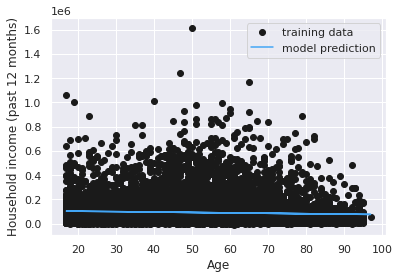

In [10]:
from sklearn.linear_model import LinearRegression
from ipywidgets import widgets
import matplotlib.pyplot as plt

lr = LinearRegression()  # make an instance of the model 
lr.fit(X, y)             # fit the model

y_pred = lr.predict(X)
plt.plot(X, y, 'o', color = 'k', label='training data')
plt.plot(X, y_pred, color='#42a5f5ff', label='model prediction')
plt.xlabel('Age')
plt.ylabel('Household income (past 12 months)')
plt.legend();

In [11]:
age_est = lr

Regressors in scikit-learn have a `.score` method which returns an $R^2$ score.  

In [13]:
age_est.score(X, y)

0.004548325066588199

Here the low $R^2$ score indicates underfitting.  In other words, our model isn't very good.  This isn't surprising, since we've ignored most of our data.  Furthermore, age and income may not be linearly correlated (try plotting them)! We'll get better results by including more features and using more sophisticated models.  

## Question 2: Full Linear Model

Next, we'll build a linear model that uses all of the features in the data set instead of just one.  

In [14]:
X = vet_data.drop('HINCP', axis=1)
y = vet_data['HINCP']

This might seem like a repeat of the previous question, but there's a problem: all of the other features in our data set are categorical!  

For example, the `marital` column represents marital status using the following codes:

> 1: married

> 2: divorced

> 3: widowed, separated

> 4: never married

The numerical order of these labels isn't meaningful (someone who's divorced isn't more married than someone who's separated), so it doesn't make sense to feed them directly into a linear model.  A better alternative is to use one hot encoding, effectively creating a new indicator variable for each label.

We can do this using scikit-learn's [`OneHotEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).  

In [15]:
from sklearn.preprocessing import OneHotEncoder

As an example, suppose we have a matrix with two categorical features.  The first feature takes on the values {1,2,3,4} while the second takes on the values {10,20}.

In [16]:
cat_feats = np.array([[1,10],[2,20],[3,10],[4,20],[3,10],[2,20],[1,10]])
cat_feats

array([[ 1, 10],
       [ 2, 20],
       [ 3, 10],
       [ 4, 20],
       [ 3, 10],
       [ 2, 20],
       [ 1, 10]])

Now let's run this through a one-hot encoder.

In [17]:
OneHotEncoder(categories='auto', sparse=False).fit_transform(cat_feats)

array([[1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0.]])

Note that the first four columns encode four values taken by the first feature, while the final two columns of the output represent the two values taken by the second feature.



In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGEP     20000 non-null  int64  
 1   vet      20000 non-null  int64  
 2   period   20000 non-null  float64
 3   HICOV    20000 non-null  int64  
 4   SEX      20000 non-null  int64  
 5   pregion  20000 non-null  int64  
 6   racepct  20000 non-null  int64  
 7   marital  20000 non-null  int64  
 8   school   20000 non-null  int64  
 9   emppct   20000 non-null  float64
 10  poverty  20000 non-null  int64  
 11  dispct   20000 non-null  int64  
 12  haskid   20000 non-null  int64  
 13  hhtype   20000 non-null  int64  
 14  cowr     20000 non-null  float64
dtypes: float64(3), int64(12)
memory usage: 2.4 MB


In [19]:
from sklearn.compose import ColumnTransformer


transformer_name = 'ohe_on_all_categorical_features'
transformer = OneHotEncoder(sparse=False)
columns_to_encode = [ 'vet', 'period', 'HICOV', 'SEX', 'pregion', 'racepct',
       'marital', 'school', 'emppct', 'poverty', 'dispct', 'haskid', 'hhtype',
       'cowr']

one_hot_transformer = ColumnTransformer([
    (transformer_name, transformer, columns_to_encode)], 
    remainder='passthrough')


The `.fit` method of the `ColumnTransformer` method calls `.fit` for each of the component transformers.  Similarly, `.transform` calls the `.transform` for each component and then pastes the resulting outputs into the new feature matrix.  

In [20]:
one_hot_transformer.fit_transform(X)

array([[ 0.,  1.,  0., ...,  0.,  0., 83.],
       [ 1.,  0.,  0., ...,  0.,  0., 67.],
       [ 0.,  1.,  0., ...,  0.,  0., 53.],
       ...,
       [ 0.,  1.,  0., ...,  0.,  0., 48.],
       [ 0.,  1.,  0., ...,  0.,  0., 59.],
       [ 0.,  1.,  0., ...,  0.,  0., 45.]])

Now we could apply this transformer to our data using its `.fit_transform` method, but applying transformers directly generally isn't good practice:

* Storing the original data set and the transformed data set as two different objects clutters our workspace.  There's a non-trivial chance that we'll confuse one for the other. 
* We'll need to apply the transformer again each time we encounter new data (for example, to make predictions).  This is an extra step that we might forget, and it also means that we're repeating code.
* Both of these problems are compounded when we want to apply many transformers in sequence.    

Instead, we should use scikit-learn's [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) function to organize our transformers and estimator into a single object which only needs to be applied to the data once.  

Try building a pipeline that combines our `one_hot_transformer` with a `LinearRegression()` estimator.

In [21]:
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
from shutil import rmtree

cachedir = mkdtemp()
pipe_cache = Pipeline([('ohe', one_hot_transformer), ('regressor', LinearRegression())], memory=cachedir)
pipe_cache.fit(X, y)
rmtree(cachedir)
linear_est = pipe_cache

In [22]:
# grader.score('intro_ml__linear_model', linear_est.predict)

## Question 3: Polynomial Features

Linear models cannot detect interactions between features. One way around this limitation is to create new features that encode the interactions we're interested in.  For example, we can use the values given by the product of each pair (or tuple) of features.  This is exactly what scikit-learn's [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) transformer does.    

In [23]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# For example, if our original features are x,y,z, then the new features are xy,xz,yz
polynomial_transformer.fit_transform([[2,3,5]])

array([[ 2.,  3.,  5.,  6., 10., 15.]])

If we apply `one_hot_transformer` and `polynomial_transformer` in sequence, then we'll have more features to build a linear model on top of. Let's do just that.

1. Create a `Pipeline` object of the described two step process
1. Fit the `Pipeline` object with the training data, `X`
1. Once fitted, transform the sample data created below

In [24]:
sample_data = pd.DataFrame([
    [ 31.,   2.,   3.,   1.,   2.,   2.,   1.,   1.,   2.,   3.,   0.,   2.,   2.,   1.,   1.],
    [ 20.,   2.,   3.,   1.,   1.,   3.,   1.,   4.,   2.,   1.,   0.,   2.,   1.,   2.,   1.],
    [ 22.,   2.,   3.,   1.,   2.,   4.,   1.,   1.,   1.,   3.,   1.,   2.,   2.,   1.,   1.],
    [ 73.,   1.,   3.,   1.,   1.,   1.,   1.,   1.,   2.,   3.,   0.,   1.,   1.,   1.,   1.],
    [ 68.,   2.,   3.,   1.,   2.,   1.,   1.,   3.,   2.,   3.,   0.,   1.,   1.,   1.,   1.]
], columns=X.columns)

In [25]:
cachedir = mkdtemp()

pipe_poly = Pipeline([('ohe', one_hot_transformer), ('poly', polynomial_transformer)], memory=cachedir)
pipe_poly.fit(X)
sample_data_transformed = pipe_poly.transform(sample_data)

rmtree(cachedir)

In [26]:
sample_data_transformed

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

Your answer should have 5 rows and 1128 columns for the transformed `sample_data`.

In [27]:
# What data should be fit on, and what data transformed?
grader.check(sample_data_transformed.shape == (5, 1128))

True

If you look at the output, you may notice that most of the entries are zero!    

In [29]:
# The percentage of non-zero elements in our output.
100 * (sample_data_transformed != 0).sum() / (5 * 1128)

10.638297872340425

Unfortunately, this is an inevitable consequence of using `OneHotEncoder` and `PolynomialFeatures` together.  Most of the variables coming from one hot encoding are equal to zero most of the time, and it follows that the cross terms will equal zero with an even greater frequency.  For this reason, `PolynomialFeatures` is usually used with features which are continuous to begin with.

This doesn't mean that our transformed data is useless, but variables that are zero most of the time aren't contributing as much to our model, and giving them too much weight may contribute to overfitting.  In our case, a better approach is to switch to a non-linear model.

## Question 4: Decision Tree Regressor

A decision tree is a binary tree that sorts data into groups by comparing observations to reference values one feature at a time.  Different features can be considered at different nodes, so decision trees are capable of encoding non-linear behavior, effectively capturing interactions between features.  

Decision trees can also make a sequence of splits based on a single feature, effectively approximating non-linear functions of a single variable.  This is especially relevant because of the `AGEP` variable that we discussed above.  Intuition should tell us that the dependence of income on age is not linear.  So we'll have better luck with a non-linear model.

Create a new model using [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

In [30]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV

# est = DecisionTreeRegressor()
# gs = GridSearchCV(
#     est,
#     {"max_depth": range(1,30),'min_samples_leaf':range(2,100)},  # range of hyperparameters to test
#     cv=10,  # 10-fold cross validation
#     n_jobs=2,  # run each hyperparameter in one of two parallel jobs
# )
# gs.fit(X, y)

# print("The best hyperparameter value is: ", gs.best_params_)

In [31]:
from sklearn.tree import DecisionTreeRegressor

tree_est = DecisionTreeRegressor(max_depth=13,min_samples_leaf=97  ).fit(X, y)

Some things to consider:

* By default, a decision tree will keep growing until it has pure leaves.  For regression, this can mean that we get a different leaf for each sample.  Obviously this is a recipe for overfitting, so we should limit the growth of the tree by setting hyperparameters like `max_depth` or `min_samples_leaf`.  [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) can help you find the optimal values.  
* Is one hot encoding still necessary?  Why or why not?